# 1: Loading Dataset and Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

# 2 : Exploratory Data Analysis

## 2A : Total records, Null count

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We get to know that the datatypes of each feature along with their number of records : 5110 entries in all records except bmi which has 4909 records

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only BMI column has null values (201 records)

## 2B : Mean, median, std-dev for each numerical column

In [6]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

Above we can see the mean, median(50%) and std for each numerical column

## 2 C : Imputing null values of BMI using spline interpolation

In [8]:
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [9]:
df = df.interpolate(method='spline', order=3)

We use Spline interpolation because it offers smoothness, accurate estimates, avoids overshooting, preserves data shape and provides flexiblility in degree for complex patterns

In [10]:
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  26.388688   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   
5        Private          Urban             186.21  29.000000   
6        Private          Rural              70.09  27.400000   
7        Private          Urban              94.39  22.800000   
8        Private          Rural              76.15  21.912779   
9        Private          Urban              58.57  24.200000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1  
5  formerly smoked       1  
6     never smoked       1  
7     never smoked       1  
8          Unknown       1  
9          Unknown       1

# 3 : Data Visualization

## 3A : Univariate Analysis

Univariate analysis is the examination and summary of data from a single variable to gain insights into its distribution, central tendency, and dispersion without considering the influence of other variables.

In [21]:
continous_features = ['age','avg_glucose_level','bmi']

In [15]:
def get_histogram(feature):
    min_val = int(min(df[feature]))
    max_val = int(max(df[feature]))
    custom_bins = [i for i in range(min_val,max_val+1)]
    #plt.hist(df[feature],bins=custom_bins)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=custom_bins)
    plt.title(f"Distribution of {feature} in our dataset")
    plt.show()

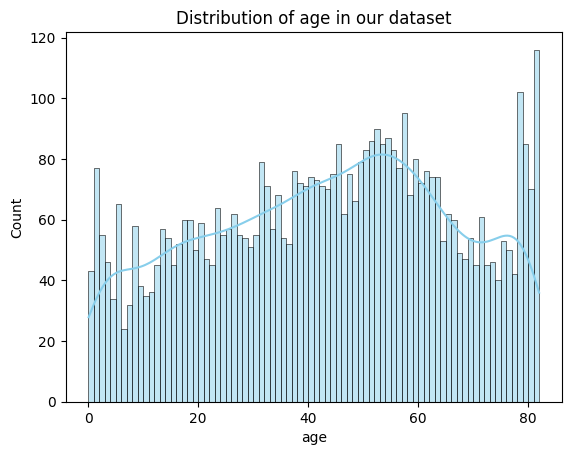

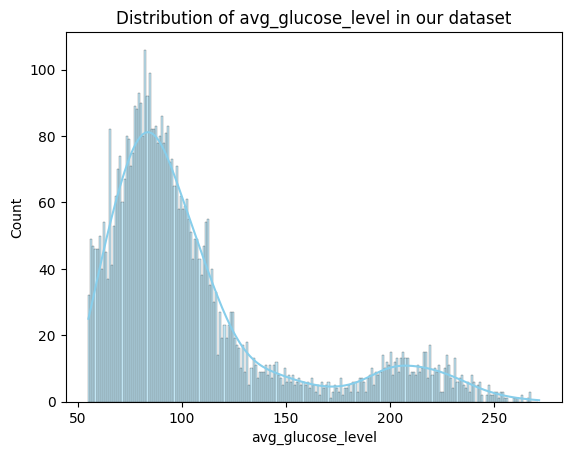

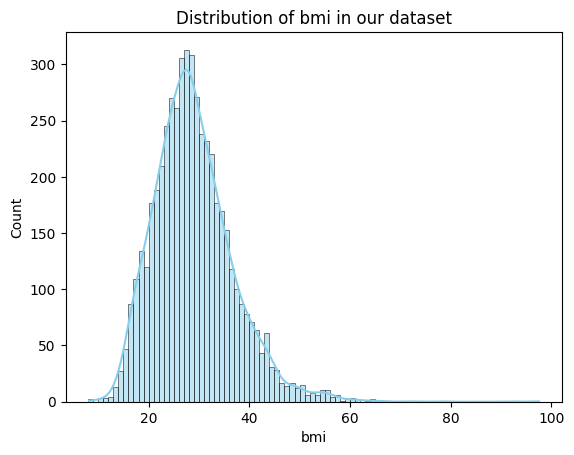

In [22]:
for feature in continous_features:
    get_histogram(feature)

We can observe the distrution of our continous features - age, bmi and avg_glucose_level in our dataset. We find that for Bmi our major dataset in present in 23-35 range peaking at around 30, Similarly for avg_glucose_level our major chunk of data shows the records having 70-100 avg glucose levels. Age is mostly evenly distributed , however there are some dips at ages around 8 and 75 yrs olds. 

In [24]:
categorical_features = ['gender','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

In [26]:
def get_pie_plot(feature):
    category_counts = df[feature].value_counts()  
    colors = ['blue', 'green', 'orange', 'brown']
   
    plt.figure(figsize=(6, 4))  
    
    plt.pie(category_counts, labels=category_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    
    plt.title(f'Percentage of Values in {feature} Column')
    plt.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.2, 1))
    # Show the plot
    plt.show()

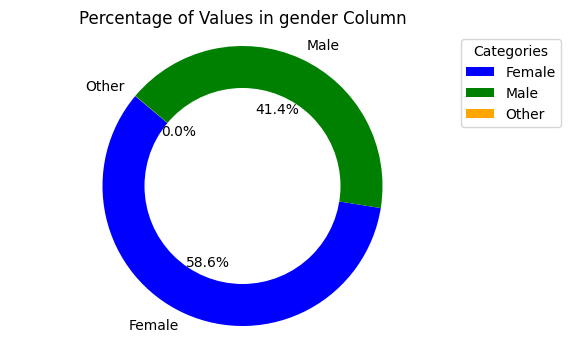

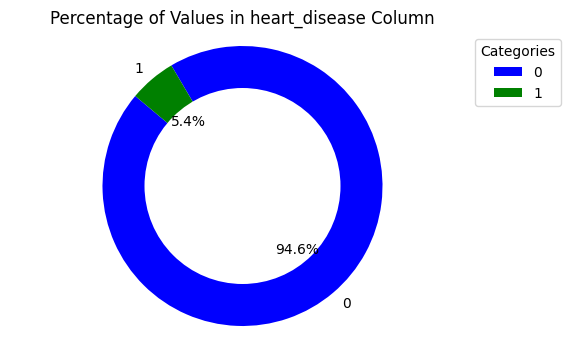

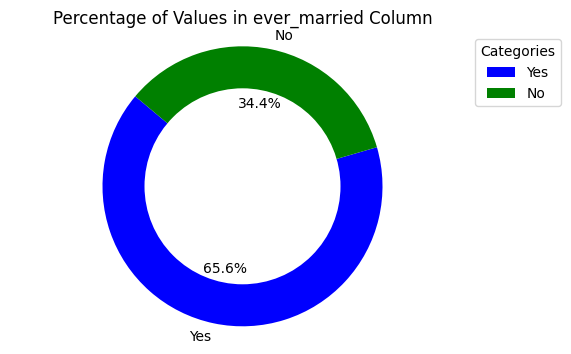

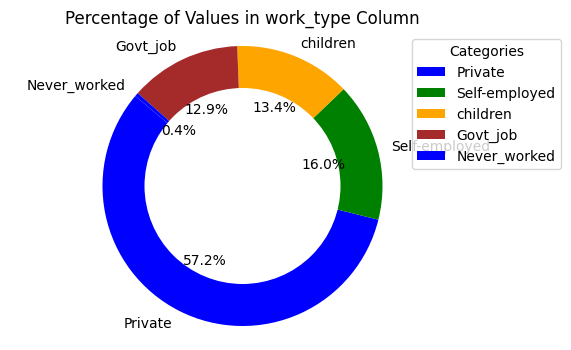

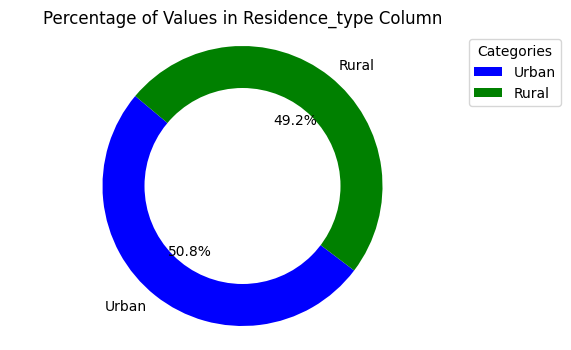

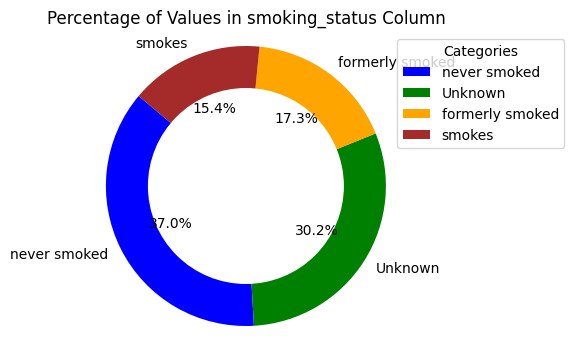

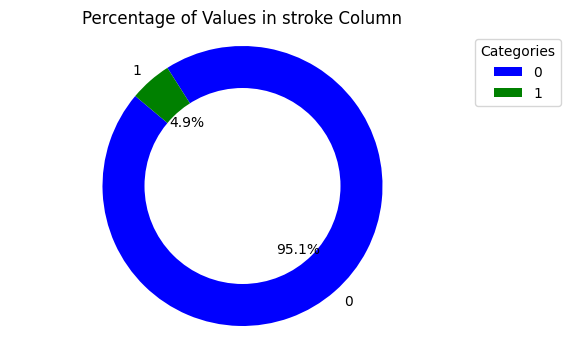

In [27]:
for feature in categorical_features:
    get_pie_plot(feature)

We can observe the distrution of our categorical features - age, bmi and avg_glucose_level in our dataset gender, heart_disease, work_type, residence_type, smoking_status and stroke. We have more data for females in our dataset,we have extremely low amount of dataset of people having strokes and heart_disease,more than 2/3rd of records we have contain true for ever_married and a major chunck of records are involved in pricate jobs. Number of people in govt jobs and free lancing are lower than private ones but its alright because of the higher tendancy of people to be involved into private jobs. We have a satisfactory number of children in our dataset as well. A major shortcoming is that the smoking status of about 1/3rs of the records is unknown.

## Bivariate Analysis

Bivariate analysis involves the study of the relationship between two variables, aiming to identify patterns, correlations, or associations between them, providing insights into their mutual interactions and dependencies.

In [29]:
categorical_features = ['gender','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

In [28]:
def get_count_plot(feature):
    category_counts = df[feature].value_counts()
    
    plt.figure(figsize=(6, 4)) 
    grouped_df = df.groupby([feature, 'stroke']).size().unstack()
    bar_plot = grouped_df.plot(kind='bar', stacked=True, color=['tab:blue', 'tab:red'],edgecolor='black')

    plt.xlabel(feature.title())
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.title(f'Count Plot of {feature} with Total Count')

    plt.show()

<Figure size 600x400 with 0 Axes>

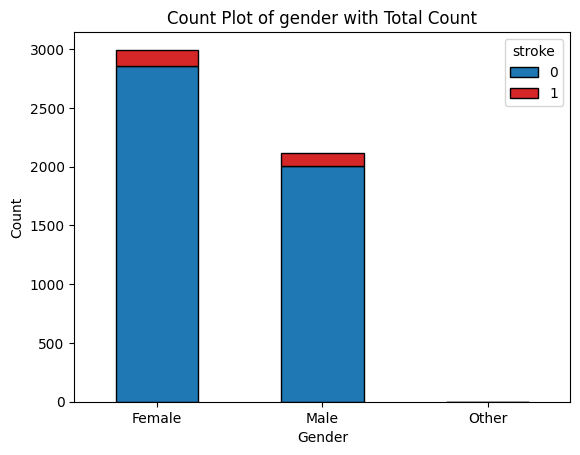

<Figure size 600x400 with 0 Axes>

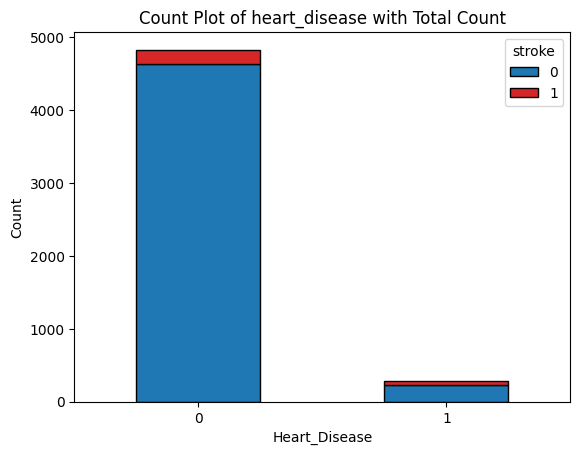

<Figure size 600x400 with 0 Axes>

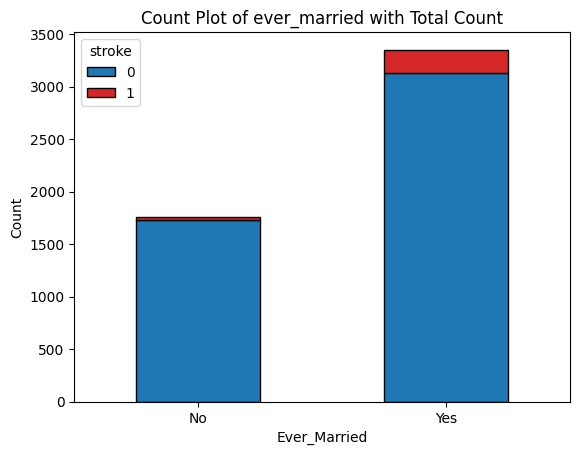

<Figure size 600x400 with 0 Axes>

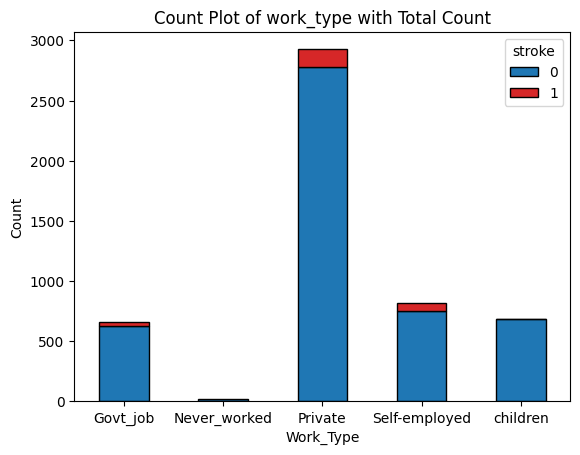

<Figure size 600x400 with 0 Axes>

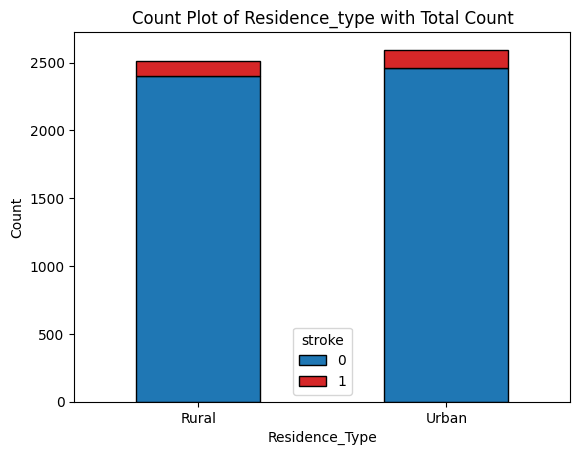

<Figure size 600x400 with 0 Axes>

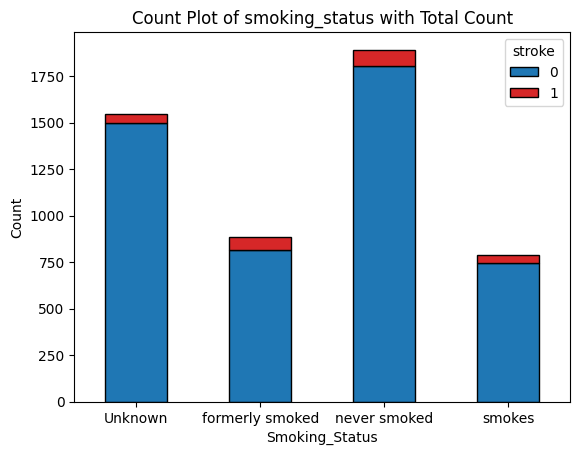

<Figure size 600x400 with 0 Axes>

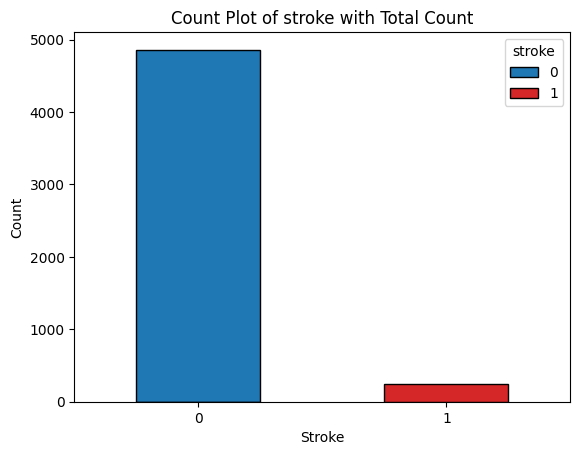

In [30]:
for feature in categorical_features:
    get_count_plot(feature)

We observe the amount of records in each categorical column suffering from strokes. We can observe that children are mostly immune from strokes and people in govt jobs are also less likely to have the same. People living in urban areas are a bit more suseptible to strokes and so are people with heart diseases. 

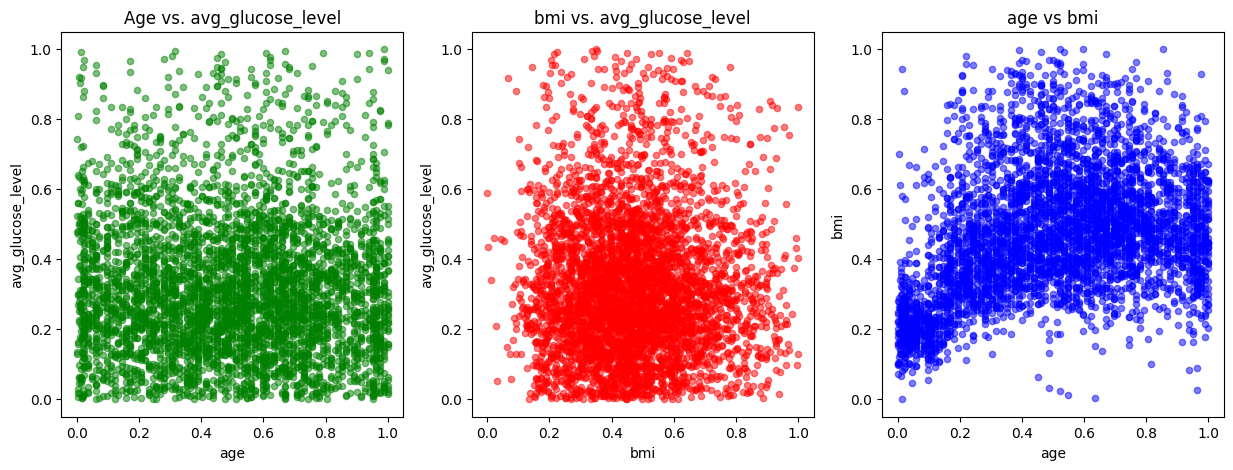

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
df.plot(kind='scatter', x='age', y='bmi', alpha=0.5, color='blue', ax=axes[2], title="age vs bmi")
plt.show()

We can observe the relation of various continous features with each other.We have that generally bmi is increasing with age and avg_glucose level tends to remain around the same with age.

## Multivariate Analysis

Multivariate analysis is the study of the relationship between multiple variables simultaneously, aiming to understand complex interactions and dependencies, providing comprehensive insights into the data's structure and patterns.

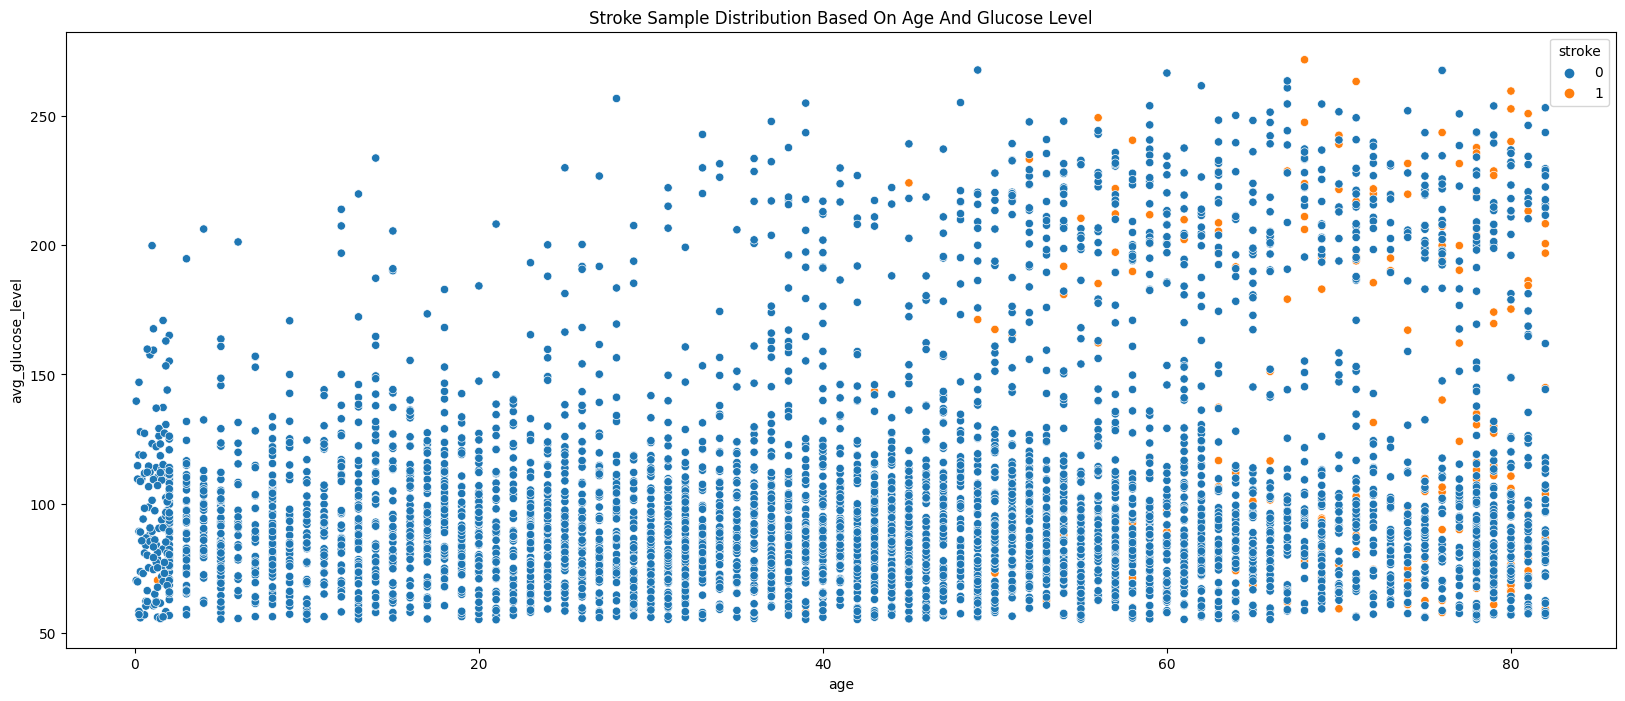

In [35]:
plt.figure(figsize=(20, 8))
plt.title('Stroke Sample Distribution Based On Age And Glucose Level')
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['stroke'])
plt.show()

We can clearly observe that the probablity of strokes increases with incease in both age and avg_glucose_level

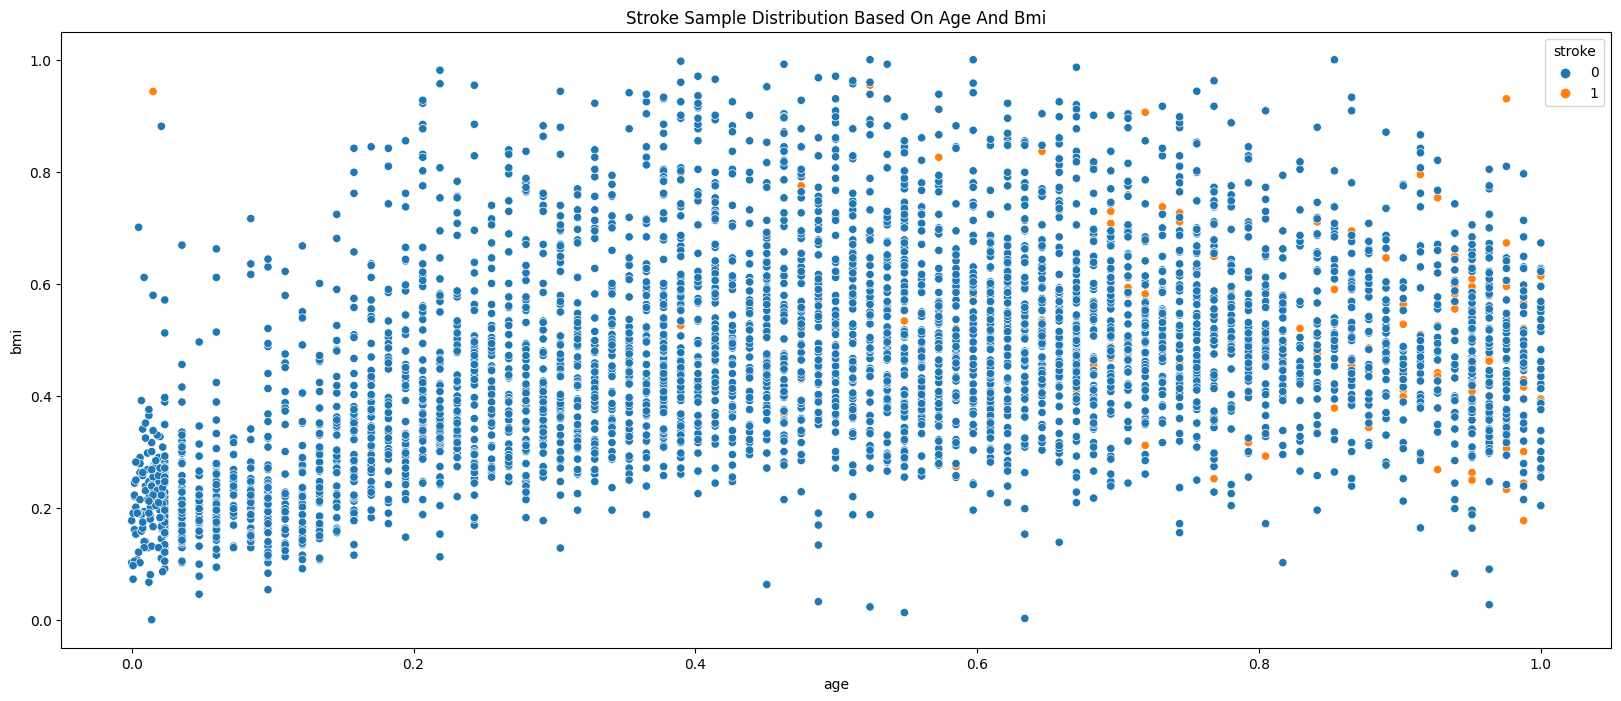

In [161]:
plt.figure(figsize=(20, 8))
plt.title('Stroke Sample Distribution Based On Age And Bmi')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.show()

We can see that people in older ages along with high Bmi are highly susceptible to strokes

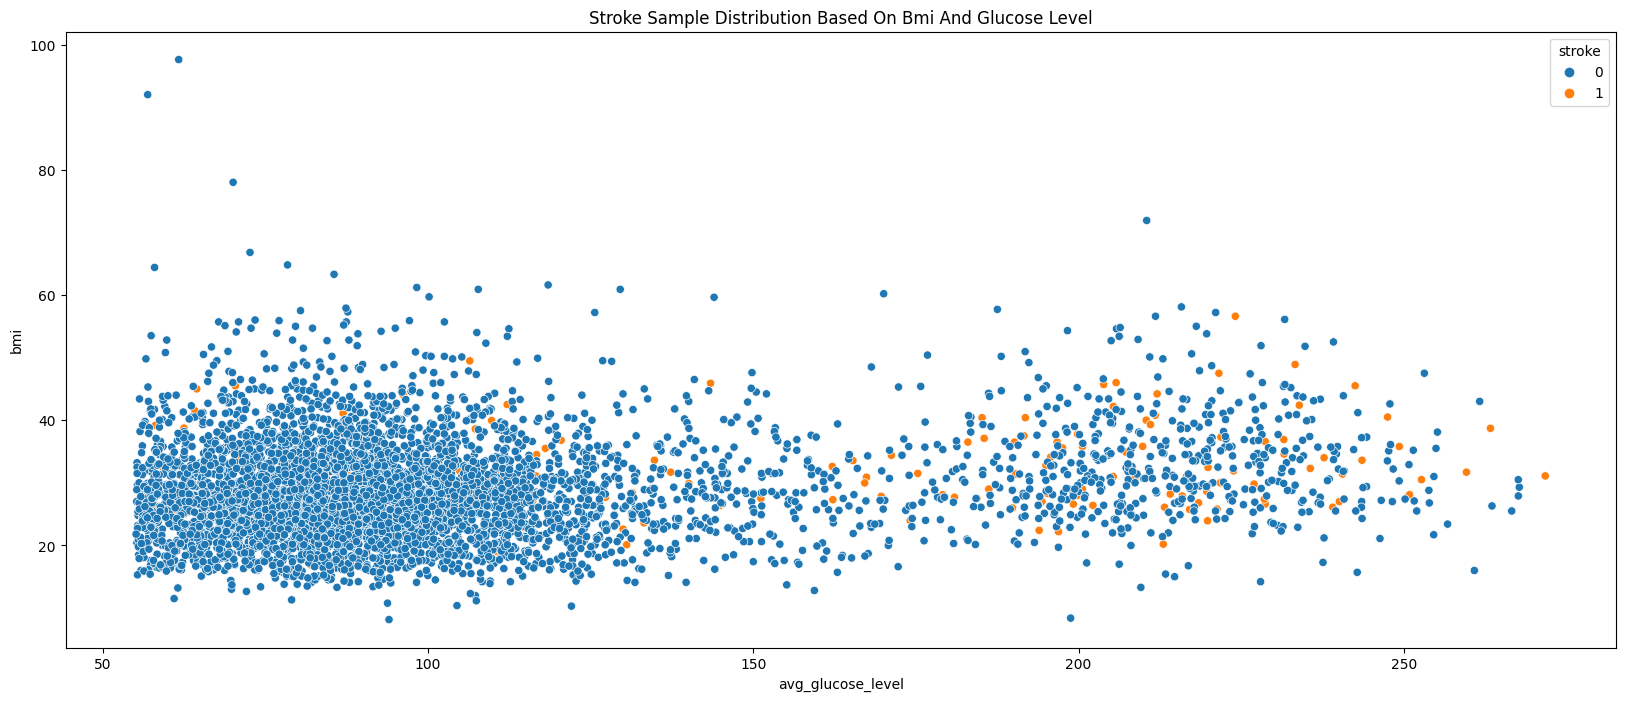

In [36]:
plt.figure(figsize=(20, 8))
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'])
plt.show()

People having good fitness level in terms of ideal Bmis and controlled avg glucose levels are less likely to suffer from strokes. However , the vice-versa is also true that people not controlling this are more likely to suffer from one.

# 4 : Feature Engineering

## 4 A : Outlier Analysis and Removal

In [37]:
def get_and_remove_outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], vert=False)
    plt.xlabel(feature)
    plt.title(f'Box Plot of Dataset with Outliers of {feature}')
    plt.show()
    
    df = df[~((df[feature] < lower_bound) | (df[feature] > upper_bound))]
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature], vert=False)
    plt.xlabel(feature)
    plt.title(f'Box Plot of Cleaned Dataset without Outliers of {feature}')
    plt.show()

    return df

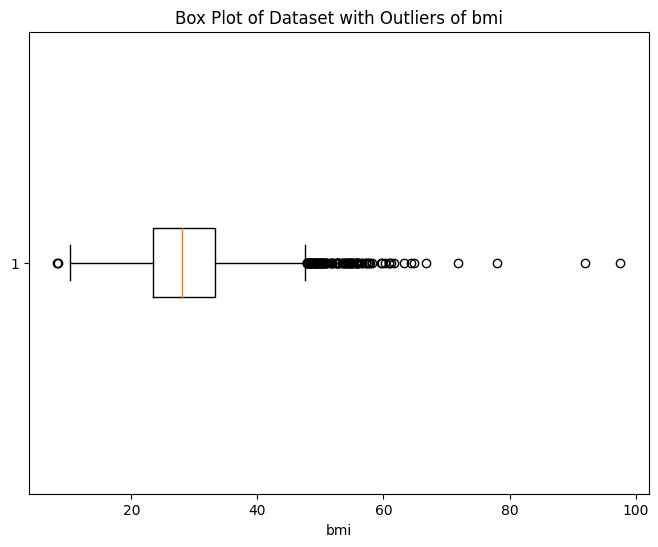

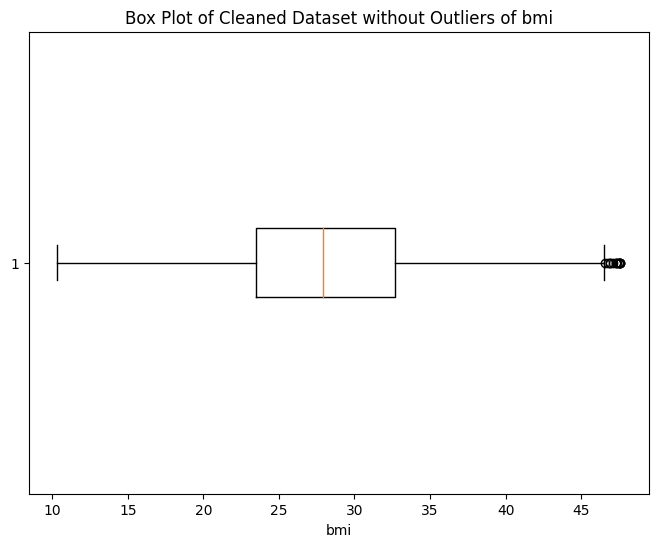

In [38]:
df= get_and_remove_outliers(df,'bmi')

Records having Bmi more than 45 are considered to be highly deviated from the rest of the records and hence discarded for the greater benefit of better predicatble model

In [40]:
df.shape

(4994, 12)

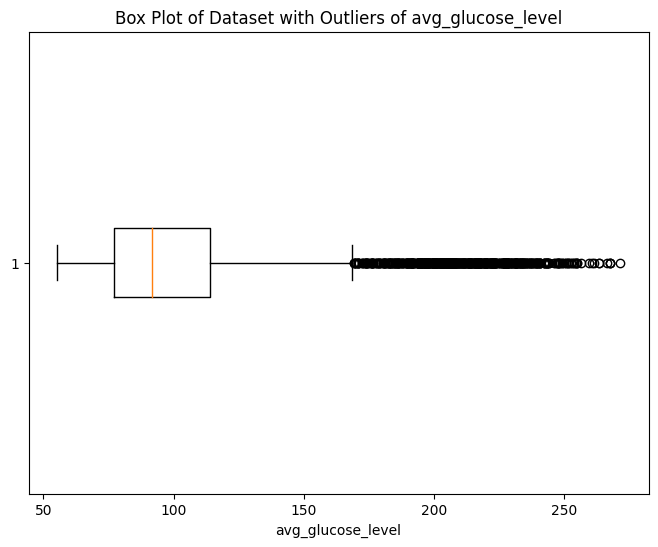

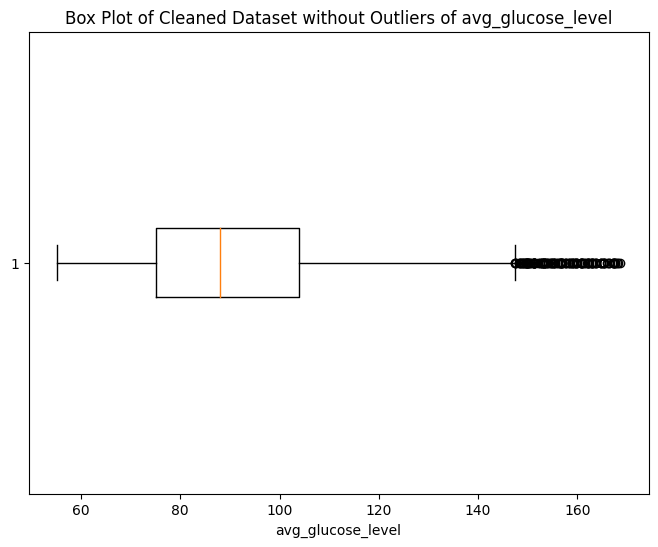

In [41]:
df= get_and_remove_outliers(df,'avg_glucose_level')

Similarly records having avg_glucose_level of more than 150 are considered outliers and are elmininated 

In [42]:
df.shape

(4397, 12)

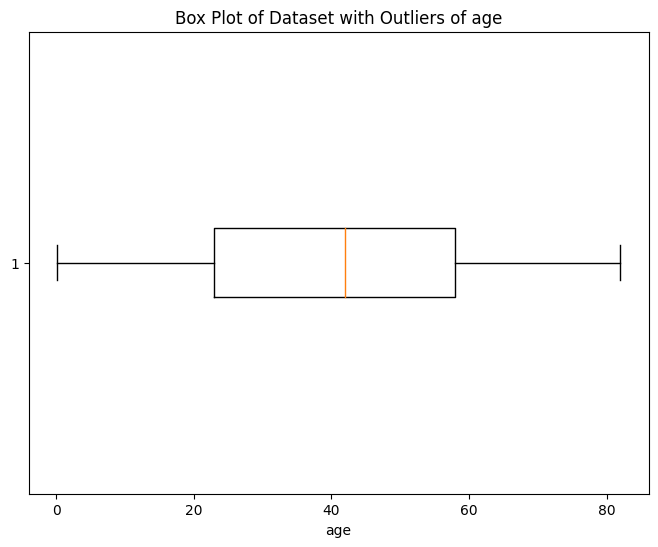

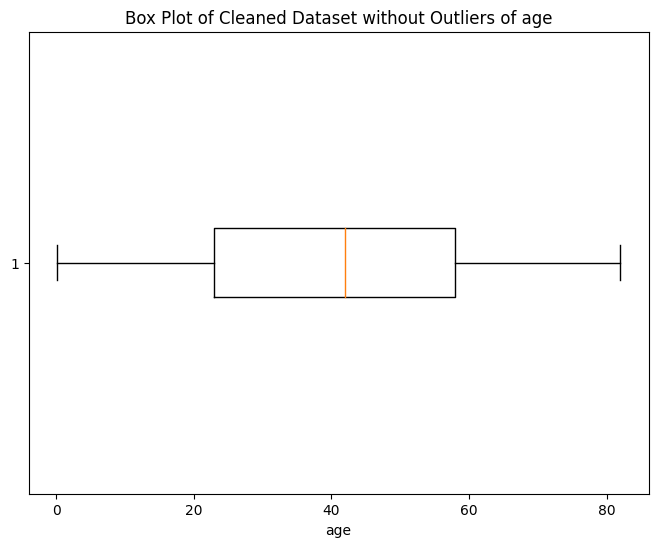

In [43]:
df= get_and_remove_outliers(df,'age')

No records are disarded beacuse all the records contain age in valuable range 

In [44]:
df.shape

(4397, 12)

# 4 B : Generating new features based on Existing Features

In [45]:
df

id  gender   age  hypertension  heart_disease ever_married  \
2     31112    Male  80.0             0              1          Yes   
6     53882    Male  74.0             1              1          Yes   
7     10434  Female  69.0             0              0           No   
8     27419  Female  59.0             0              0          Yes   
9     60491  Female  78.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
2           Private          Rural             105.92  32.500000   
6           Private          Rural              70.09  27.400000   
7           Private          Urban              94.39  22.800000   
8           Private          Rural              76.15  21.912779   
9           Private          Urban              58.57  24.200000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  22.617851   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
2        never smoked       1  
6        never smoked       1  
7        never smoked       1  
8             Unknown       1  
9             Unknown       1  
...               ...     ...  
5105     never smoked       0  
5106     never smoked       0  
5107     never smoked       0  
5108  formerly smoked       0  
5109          Unknown       0  

[4397 rows x 12 columns]

### BMI Category : Categorizing records into Underweight, Normal Weight , Overweight and Obese based on BMI

In [46]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

In [47]:
df['weight_category']=0
for index,row in df.iterrows():
    df.at[index,'weight_category'] = categorize_bmi(row['bmi'])

In [48]:
df

id  gender   age  hypertension  heart_disease ever_married  \
2     31112    Male  80.0             0              1          Yes   
6     53882    Male  74.0             1              1          Yes   
7     10434  Female  69.0             0              0           No   
8     27419  Female  59.0             0              0          Yes   
9     60491  Female  78.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
2           Private          Rural             105.92  32.500000   
6           Private          Rural              70.09  27.400000   
7           Private          Urban              94.39  22.800000   
8           Private          Rural              76.15  21.912779   
9           Private          Urban              58.57  24.200000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  22.617851   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke weight_category  
2        never smoked       1           Obese  
6        never smoked       1      Overweight  
7        never smoked       1   Normal Weight  
8             Unknown       1   Normal Weight  
9             Unknown       1   Normal Weight  
...               ...     ...             ...  
5105     never smoked       0   Normal Weight  
5106     never smoked       0           Obese  
5107     never smoked       0           Obese  
5108  formerly smoked       0      Overweight  
5109          Unknown       0      Overweight  

[4397 rows x 13 columns]

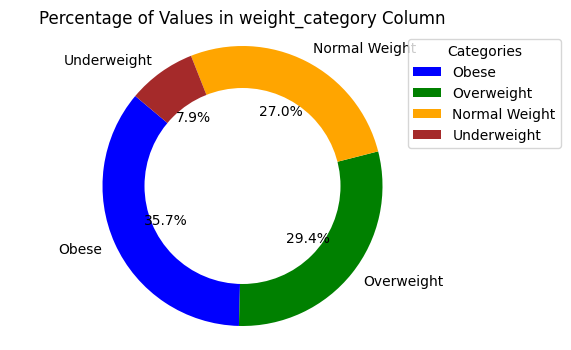

In [49]:
get_pie_plot('weight_category')

We have almost prportional number of records in each category except underweight

<Figure size 600x400 with 0 Axes>

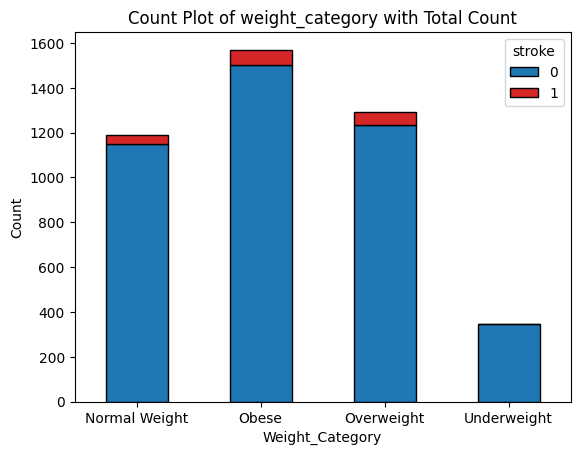

In [50]:
get_count_plot('weight_category')

We can clearly observe that with increasing weight, the chances of stroke increase. Underweight people have almost no strokes whereas obese people are likely to have one 

### Age Group : Categorizing records into Young, Middle-aged and Senior based on Age

In [52]:
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
2   31112    Male  80.0             0              1          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
8   27419  Female  59.0             0              0          Yes   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
15  58202  Female  50.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   

        work_type Residence_type  avg_glucose_level        bmi smoking_status  \
2         Private          Rural             105.92  32.500000   never smoked   
6         Private          Rural              70.09  27.400000   never smoked   
7         Private          Urban              94.39  22.800000   never smoked   
8         Private          Rural              76.15  21.912779        Unknown   
9         Private          Urban              58.57  24.200000        Unknown   
10        Private          Rural              80.43  29.700000   never smoked   
11       Govt_job          Rural             120.46  36.800000         smokes   
12        Private          Urban             104.51  27.300000         smokes   
15  Self-employed          Rural             167.41  30.900000   never smoked   
18        Private          Urban              89.22  37.800000   never smoked   

    stroke weight_category  
2        1           Obese  
6        1      Overweight  
7        1   Normal Weight  
8        1   Normal Weight  
9        1   Normal Weight  
10       1      Overweight  
11       1           Obese  
12       1      Overweight  
15       1           Obese  
18       1           Obese

In [51]:
age_groups = {
    'Young': (0, 30),
    'Middle-aged': (31, 60),
    'Senior': (61, float('inf'))
}

def categorize_age(age):
    for group, (lower_bound, upper_bound) in age_groups.items():
        if lower_bound <= age <= upper_bound:
            return group



In [53]:
df['age_group'] = df['age'].apply(categorize_age)

In [54]:
df

id  gender   age  hypertension  heart_disease ever_married  \
2     31112    Male  80.0             0              1          Yes   
6     53882    Male  74.0             1              1          Yes   
7     10434  Female  69.0             0              0           No   
8     27419  Female  59.0             0              0          Yes   
9     60491  Female  78.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
2           Private          Rural             105.92  32.500000   
6           Private          Rural              70.09  27.400000   
7           Private          Urban              94.39  22.800000   
8           Private          Rural              76.15  21.912779   
9           Private          Urban              58.57  24.200000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  22.617851   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke weight_category    age_group  
2        never smoked       1           Obese       Senior  
6        never smoked       1      Overweight       Senior  
7        never smoked       1   Normal Weight       Senior  
8             Unknown       1   Normal Weight  Middle-aged  
9             Unknown       1   Normal Weight       Senior  
...               ...     ...             ...          ...  
5105     never smoked       0   Normal Weight       Senior  
5106     never smoked       0           Obese       Senior  
5107     never smoked       0           Obese  Middle-aged  
5108  formerly smoked       0      Overweight  Middle-aged  
5109          Unknown       0      Overweight  Middle-aged  

[4397 rows x 14 columns]

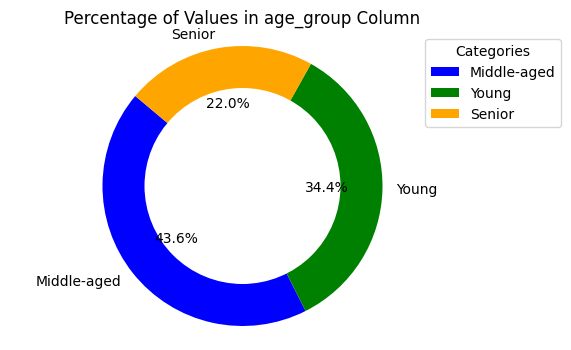

In [55]:
get_pie_plot('age_group')

We have more number of records of middle ages people followed by young and senior citizens 

<Figure size 600x400 with 0 Axes>

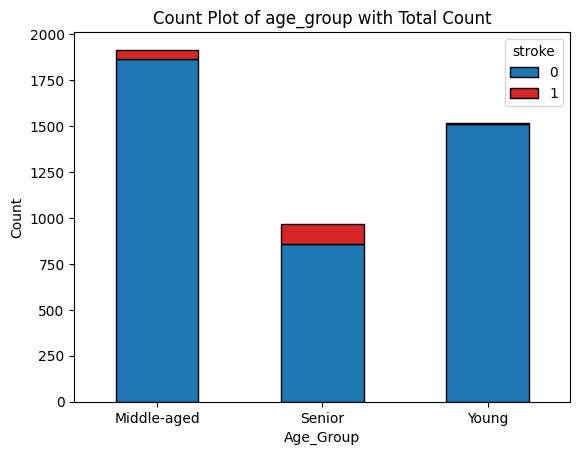

In [57]:
get_count_plot('age_group')

Age is a factor influencing stroke probability as young people have almost no strokes whereas seniors have high number of strokes

### Glucose Category : Categorizing records into Low,Normal, High and Critical based on Glucose Levels

In [93]:
thresholds = [0, 70, 100, 130,float('inf')]

# Define the labels for each category
labels = ['Low', 'Normal', 'High', 'Critical']

# Use pandas cut function to create the 'Glucose Category' column
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=thresholds, labels=labels, right=False)

In [94]:
df

id  gender   age  hypertension  heart_disease ever_married  \
2     31112    Male  80.0             0              1          Yes   
6     53882    Male  74.0             1              1          Yes   
7     10434  Female  69.0             0              0           No   
8     27419  Female  59.0             0              0          Yes   
9     60491  Female  78.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
2           Private          Rural             105.92  32.500000   
6           Private          Rural              70.09  27.400000   
7           Private          Urban              94.39  22.800000   
8           Private          Rural              76.15  21.912779   
9           Private          Urban              58.57  24.200000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  22.617851   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke weight_category    age_group glucose_category  \
2        never smoked       1           Obese       Senior             High   
6        never smoked       1      Overweight       Senior           Normal   
7        never smoked       1   Normal Weight       Senior           Normal   
8             Unknown       1   Normal Weight  Middle-aged           Normal   
9             Unknown       1   Normal Weight       Senior              Low   
...               ...     ...             ...          ...              ...   
5105     never smoked       0   Normal Weight       Senior           Normal   
5106     never smoked       0           Obese       Senior             High   
5107     never smoked       0           Obese  Middle-aged           Normal   
5108  formerly smoked       0      Overweight  Middle-aged         Critical   
5109          Unknown       0      Overweight  Middle-aged           Normal   

        Agexbmi  
2     50.990195  
6     45.028880  
7     39.663585  
8     35.956278  
9     43.446519  
...         ...  
5105  42.537373  
5106  56.920998  
5107  32.726136  
5108  36.133087  
5109  33.952909  

[4397 rows x 16 columns]

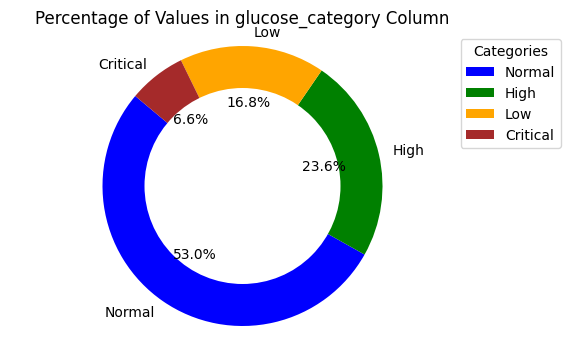

In [95]:
get_pie_plot('glucose_category')

We have high amount of records having normal avg_glucose_level

<Figure size 600x400 with 0 Axes>

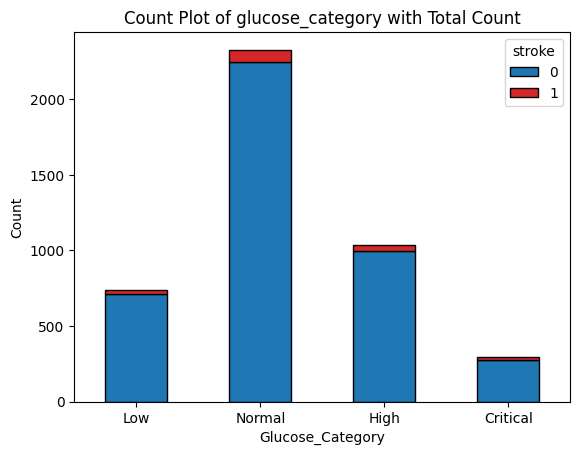

In [96]:
get_count_plot('glucose_category')

Glucose levels do not have much effet on the stroke probility. However we did eliminate a lot of critical records considering them as outliers so it might be a false assumption as well.

### Agexbmi : Analysing the combined effect of age and bmi over stroke 

In [97]:
df

id  gender   age  hypertension  heart_disease ever_married  \
2     31112    Male  80.0             0              1          Yes   
6     53882    Male  74.0             1              1          Yes   
7     10434  Female  69.0             0              0           No   
8     27419  Female  59.0             0              0          Yes   
9     60491  Female  78.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
2           Private          Rural             105.92  32.500000   
6           Private          Rural              70.09  27.400000   
7           Private          Urban              94.39  22.800000   
8           Private          Rural              76.15  21.912779   
9           Private          Urban              58.57  24.200000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  22.617851   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke weight_category    age_group glucose_category  \
2        never smoked       1           Obese       Senior             High   
6        never smoked       1      Overweight       Senior           Normal   
7        never smoked       1   Normal Weight       Senior           Normal   
8             Unknown       1   Normal Weight  Middle-aged           Normal   
9             Unknown       1   Normal Weight       Senior              Low   
...               ...     ...             ...          ...              ...   
5105     never smoked       0   Normal Weight       Senior           Normal   
5106     never smoked       0           Obese       Senior             High   
5107     never smoked       0           Obese  Middle-aged           Normal   
5108  formerly smoked       0      Overweight  Middle-aged         Critical   
5109          Unknown       0      Overweight  Middle-aged           Normal   

        Agexbmi  
2     50.990195  
6     45.028880  
7     39.663585  
8     35.956278  
9     43.446519  
...         ...  
5105  42.537373  
5106  56.920998  
5107  32.726136  
5108  36.133087  
5109  33.952909  

[4397 rows x 16 columns]

In [98]:
df['Agexbmi'] = np.sqrt(df['age'] * df['bmi'])

In [99]:
df

id  gender   age  hypertension  heart_disease ever_married  \
2     31112    Male  80.0             0              1          Yes   
6     53882    Male  74.0             1              1          Yes   
7     10434  Female  69.0             0              0           No   
8     27419  Female  59.0             0              0          Yes   
9     60491  Female  78.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
2           Private          Rural             105.92  32.500000   
6           Private          Rural              70.09  27.400000   
7           Private          Urban              94.39  22.800000   
8           Private          Rural              76.15  21.912779   
9           Private          Urban              58.57  24.200000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  22.617851   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke weight_category    age_group glucose_category  \
2        never smoked       1           Obese       Senior             High   
6        never smoked       1      Overweight       Senior           Normal   
7        never smoked       1   Normal Weight       Senior           Normal   
8             Unknown       1   Normal Weight  Middle-aged           Normal   
9             Unknown       1   Normal Weight       Senior              Low   
...               ...     ...             ...          ...              ...   
5105     never smoked       0   Normal Weight       Senior           Normal   
5106     never smoked       0           Obese       Senior             High   
5107     never smoked       0           Obese  Middle-aged           Normal   
5108  formerly smoked       0      Overweight  Middle-aged         Critical   
5109          Unknown       0      Overweight  Middle-aged           Normal   

        Agexbmi  
2     50.990195  
6     45.028880  
7     39.663585  
8     35.956278  
9     43.446519  
...         ...  
5105  42.537373  
5106  56.920998  
5107  32.726136  
5108  36.133087  
5109  33.952909  

[4397 rows x 16 columns]

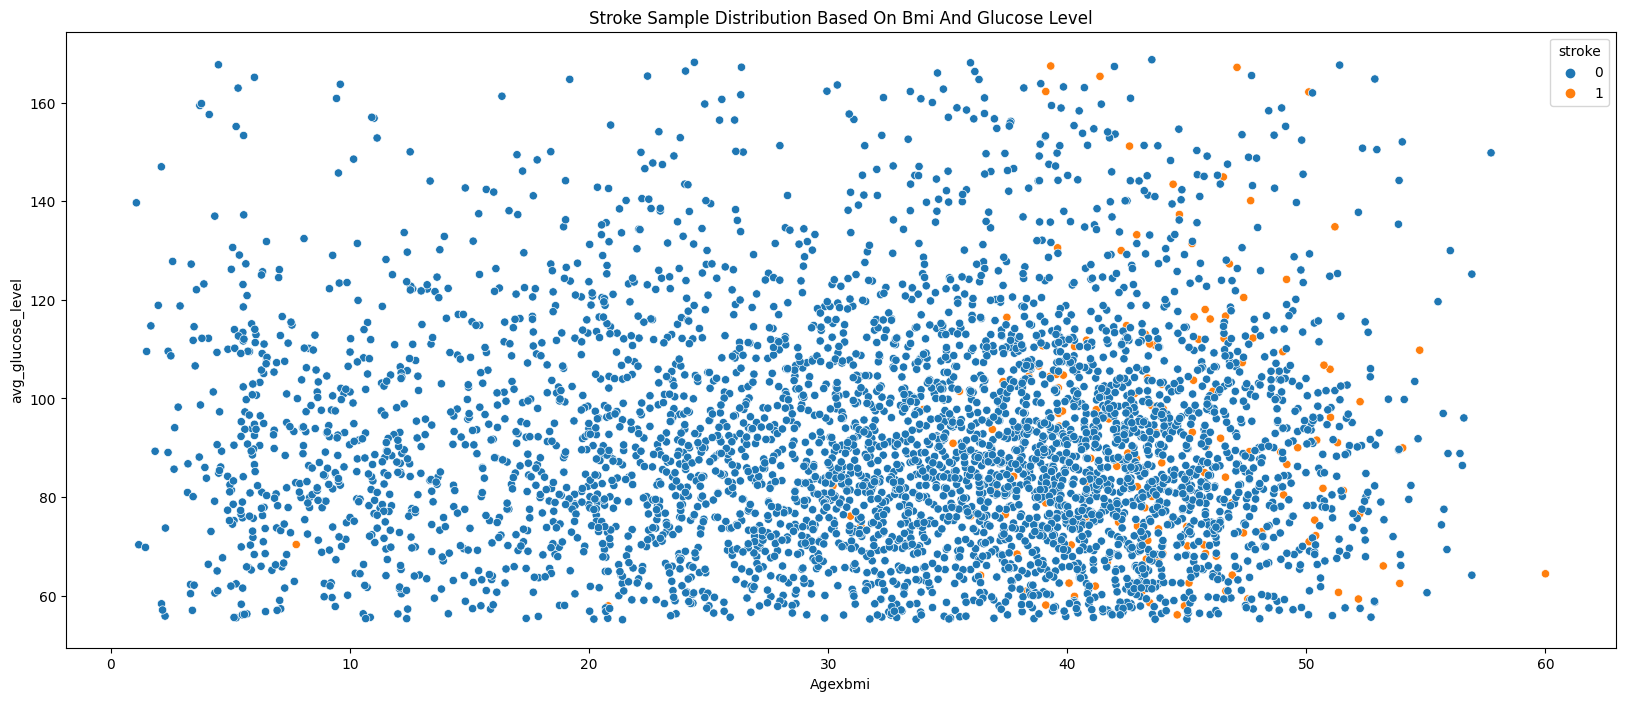

In [100]:
plt.figure(figsize=(20, 8))
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['Agexbmi'],y=df['avg_glucose_level'],hue=df['stroke'])
plt.show()

Combined Age , Gender and Glucose levels have a much higher proportion of records suffering from strokes. Age and Gender increase affects stroke probabilty significant as compared to avg_glucose levels.

## 4 C : Scaling on all numerical columns

In [106]:
numerical_columns = df[['age','avg_glucose_level','bmi']]

In [107]:
numerical_columns

age  avg_glucose_level        bmi
2     80.0             105.92  32.500000
6     74.0              70.09  27.400000
7     69.0              94.39  22.800000
8     59.0              76.15  21.912779
9     78.0              58.57  24.200000
...    ...                ...        ...
5105  80.0              83.75  22.617851
5106  81.0             125.20  40.000000
5107  35.0              82.99  30.600000
5108  51.0             166.29  25.600000
5109  44.0              85.28  26.200000

[4397 rows x 3 columns]

Min-Max scaling (MinMaxScaler) normalizes data to a specific range, typically [0, 1]. It preserves relative relationships among features, prevents some algorithms from being dominated by large-scale features, and ensures all features contribute equally to model training, enhancing performance in some cases.

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns.columns] = scaler.fit_transform(numerical_columns)

In [109]:
df

id  gender       age  hypertension  heart_disease ever_married  \
2     31112    Male  0.975586             0              1          Yes   
6     53882    Male  0.902344             1              1          Yes   
7     10434  Female  0.841309             0              0           No   
8     27419  Female  0.719238             0              0          Yes   
9     60491  Female  0.951172             0              0          Yes   
...     ...     ...       ...           ...            ...          ...   
5105  18234  Female  0.975586             1              0          Yes   
5106  44873  Female  0.987793             0              0          Yes   
5107  19723  Female  0.426270             0              0          Yes   
5108  37544    Male  0.621582             0              0          Yes   
5109  44679  Female  0.536133             0              0          Yes   

          work_type Residence_type  avg_glucose_level       bmi  \
2           Private          Rural           0.447341  0.595174   
6           Private          Rural           0.131825  0.458445   
7           Private          Urban           0.345808  0.335121   
8           Private          Rural           0.185188  0.311335   
9           Private          Urban           0.030380  0.372654   
...             ...            ...                ...       ...   
5105        Private          Urban           0.252113  0.330237   
5106  Self-employed          Urban           0.617119  0.796247   
5107  Self-employed          Rural           0.245421  0.544236   
5108        Private          Rural           0.978954  0.410188   
5109       Govt_job          Urban           0.265586  0.426273   

       smoking_status  stroke weight_category    age_group glucose_category  \
2        never smoked       1           Obese       Senior             High   
6        never smoked       1      Overweight       Senior           Normal   
7        never smoked       1   Normal Weight       Senior           Normal   
8             Unknown       1   Normal Weight  Middle-aged           Normal   
9             Unknown       1   Normal Weight       Senior              Low   
...               ...     ...             ...          ...              ...   
5105     never smoked       0   Normal Weight       Senior           Normal   
5106     never smoked       0           Obese       Senior             High   
5107     never smoked       0           Obese  Middle-aged           Normal   
5108  formerly smoked       0      Overweight  Middle-aged         Critical   
5109          Unknown       0      Overweight  Middle-aged           Normal   

        Agexbmi  
2     50.990195  
6     45.028880  
7     39.663585  
8     35.956278  
9     43.446519  
...         ...  
5105  42.537373  
5106  56.920998  
5107  32.726136  
5108  36.133087  
5109  33.952909  

[4397 rows x 16 columns]

## 4 D : Encoding on all categorical columns

In [110]:
from sklearn.preprocessing import LabelEncoder

Label encoding converts categorical data into numerical values, making it suitable for machine learning algorithms. It simplifies the handling of categorical features, enables model compatibility, and helps algorithms interpret the ordinality of categories, improving model training and prediction performance.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4397 entries, 2 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4397 non-null   int64   
 1   gender             4397 non-null   object  
 2   age                4397 non-null   float64 
 3   hypertension       4397 non-null   int64   
 4   heart_disease      4397 non-null   int64   
 5   ever_married       4397 non-null   object  
 6   work_type          4397 non-null   object  
 7   Residence_type     4397 non-null   object  
 8   avg_glucose_level  4397 non-null   float64 
 9   bmi                4397 non-null   float64 
 10  smoking_status     4397 non-null   object  
 11  stroke             4397 non-null   int64   
 12  weight_category    4397 non-null   object  
 13  age_group          4397 non-null   object  
 14  glucose_category   4397 non-null   category
 15  Agexbmi            4397 non-null   float64 
dtypes: category

In [112]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

In [113]:
df

id  gender       age  hypertension  heart_disease  ever_married  \
2     31112       1  0.975586             0              1             1   
6     53882       1  0.902344             1              1             1   
7     10434       0  0.841309             0              0             0   
8     27419       0  0.719238             0              0             1   
9     60491       0  0.951172             0              0             1   
...     ...     ...       ...           ...            ...           ...   
5105  18234       0  0.975586             1              0             1   
5106  44873       0  0.987793             0              0             1   
5107  19723       0  0.426270             0              0             1   
5108  37544       1  0.621582             0              0             1   
5109  44679       0  0.536133             0              0             1   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
2             2               0           0.447341  0.595174               2   
6             2               0           0.131825  0.458445               2   
7             2               1           0.345808  0.335121               2   
8             2               0           0.185188  0.311335               0   
9             2               1           0.030380  0.372654               0   
...         ...             ...                ...       ...             ...   
5105          2               1           0.252113  0.330237               2   
5106          3               1           0.617119  0.796247               2   
5107          3               0           0.245421  0.544236               2   
5108          2               0           0.978954  0.410188               1   
5109          0               1           0.265586  0.426273               0   

      stroke  weight_category  age_group glucose_category    Agexbmi  
2          1                1          1             High  50.990195  
6          1                2          1           Normal  45.028880  
7          1                0          1           Normal  39.663585  
8          1                0          0           Normal  35.956278  
9          1                0          1              Low  43.446519  
...      ...              ...        ...              ...        ...  
5105       0                0          1           Normal  42.537373  
5106       0                1          1             High  56.920998  
5107       0                1          0           Normal  32.726136  
5108       0                2          0         Critical  36.133087  
5109       0                2          0           Normal  33.952909  

[4397 rows x 16 columns]

# 5 : Data Preparation

## 5 A : Appying SMOTE to handle data imbalance 

SMOTE (Synthetic Minority Over-sampling Technique) is used to address class imbalance in datasets.This is use to balance the stroke records proportion in our dataset. It generates synthetic samples for the minority class, balancing the data and improving model performance. The benefits include increased accuracy, reduced bias towards the majority class, and better generalization on the imbalanced datase

Total records : 4397
Records having strokes : 164
Percentage record of strokes : 3.73%


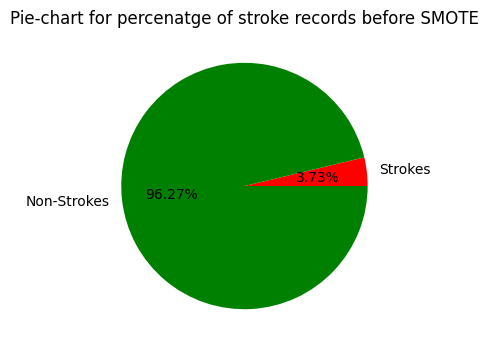

In [117]:
strokes=0
total = len(df['stroke'])
for i in df['stroke']:
    if i:
        strokes+=1
non_strokes=total-strokes
print(f'Total records : {total}')
print(f'Records having strokes : {strokes}')
print(f'Percentage record of strokes : {round(strokes/total * 100,2)}%')
categories = ['Strokes', 'Non-Strokes']
values = [strokes, non_strokes]
custom_colors = ['red', 'green']
plt.figure(figsize=(4, 4))
plt.pie(values, labels=categories, autopct='%1.2f%%', colors=custom_colors)
plt.title('Pie-chart for percenatge of stroke records before SMOTE')
plt.show()

In [115]:
X =df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
Y = df['stroke']

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(X, Y)

Total records : 8466
Records having strokes : 4233
Percentage record of strokes : 50.0%


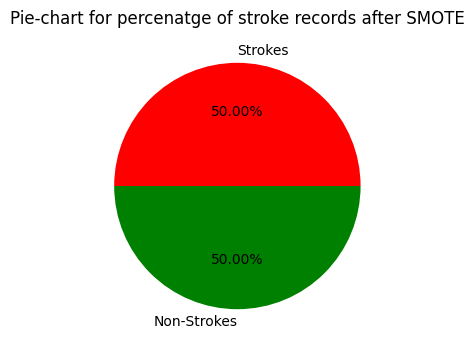

In [120]:
strokes=0
total = len(y_resampled)
for i in y_resampled:
    if i:
        strokes+=1
non_strokes=total-strokes
print(f'Total records : {total}')
print(f'Records having strokes : {strokes}')
print(f'Percentage record of strokes : {round(strokes/total * 100,2)}%')
categories = ['Strokes', 'Non-Strokes']
values = [strokes, non_strokes]
custom_colors = ['red', 'green']
plt.figure(figsize=(4, 4))
plt.pie(values, labels=categories, autopct='%1.2f%%', colors=custom_colors)
plt.title('Pie-chart for percenatge of stroke records after SMOTE')
plt.show()

We now have a balanced dataset which will give better results for the model.

## 5 B : Splitting Data into train,test

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# 6 : Model Training

In [123]:
from xgboost import XGBClassifier

In [124]:
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(x_test)

I tried various diffrent models like random forest, decision trees, SVC , KNN, GradientBoostingClassifier , Logistic Regression , etc. I got the best result in XG Boost classifier and hence have chosen it as the final model. The results of XG Boost classifier were best followed by random forest, GradientBoostingClassifier , SVC.

I did hyperparameter tuning while selecting the order and method for imputing the null vales. I also did hyperparamter tuning for number of trees in random forest and n_neighbours in knn. However , No explicit hyperparamter tuning is required for XG Boost classifier as it does that inherently . Hence , I have not specified the same. Also XG boost inherently takes an amount of training data into validation set to boost and imrprove its performace so I have not mentioned the validation split here and just did our classical train test split.

# 7 : Model Evaluation

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [165]:
def get_report(y_test,y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [166]:
get_report(y_test,y_pred)

Accuracy: 0.9669421487603306
Precision Score: 0.9761620977353993
Recall Score: 0.9578947368421052
F1 Score: 0.9669421487603307
Confusion Matrix:
 [[819  20]
 [ 36 819]]


I have used the following metrics for comparision because 

Confusion Matrix: Provides a comprehensive summary of the model's performance by showing the true positive, true negative, false positive, and false negative predictions. It helps in understanding the type and quantity of errors the model makes.

Accuracy Score: Gives a simple and intuitive measure of the overall correct predictios.

Precision Score: Focuses on the accuracy of positive predictions, making it valuahere ashere false positives are cotor.

Recall Score: Measures the model's ability to find all positive instances, which is cras missing even a single stoke prediction can have severe consequencesactor.

F1 Score: Balances precision and recall, providing a single metric that considers both false positives and false negatasets.

In [168]:
from sklearn.metrics import roc_curve, roc_auc_score

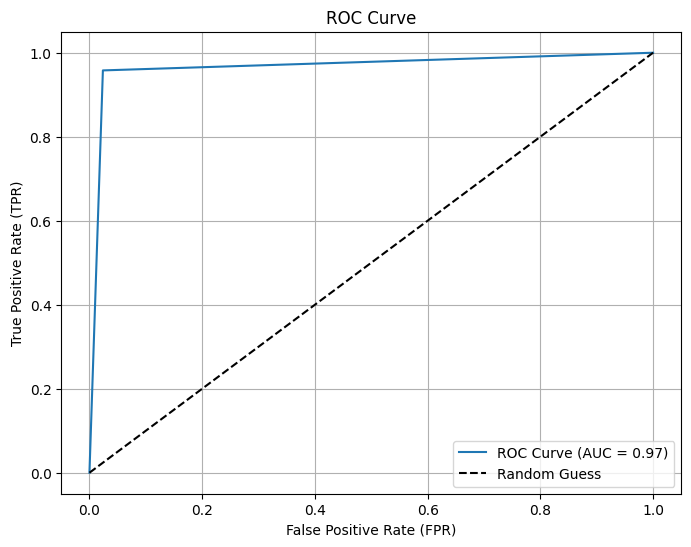

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The ROC AUC curve provides a comprehensive evaluation of a classification model's ability to discriminate between classes, is insensitive to class imbalance, facilitates model comparison, and offers a single metric for performance assessment across various classification thresholds.

It shows that our model is performing well as our AUC score is 0.97 and 1 is the idea senario.

# 8 : Saving Model to Pickle file

Saving a model to a pickle file allows for model persistence, easy sharing across platforms, faster loading times, reproducibility, seamless integration into applications, version compatibility, and efficient storage, enhancing model reusability and scalability in various projects.







In [131]:
import pickle

In [133]:
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)

# 9 : Importing Pickle Model

In [134]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [135]:
y_pred_loaded = loaded_model.predict(x_test)

Predicting values using model loaded from pickle file

In [171]:
get_report(y_test,y_pred_loaded)

Accuracy: 0.9669421487603306
Precision Score: 0.9761620977353993
Recall Score: 0.9578947368421052
F1 Score: 0.9669421487603307
Confusion Matrix:
 [[819  20]
 [ 36 819]]


# 10 : Exporting Model Predictions along with dataset to csv file

In [138]:
predicted_values = pd.Series(y_pred_loaded)

In [144]:
x_test

gender       age  hypertension  heart_disease  ever_married  work_type  \
5946       1  0.696724             0              0             0          2   
5292       0  0.948494             0              0             1          2   
5904       0  0.982453             0              0             0          2   
879        0  0.462891             0              0             1          2   
5761       0  0.900353             0              0             1          2   
...      ...       ...           ...            ...           ...        ...   
7824       0  0.998081             0              0             1          2   
4932       0  0.932004             0              0             1          3   
4812       0  0.888224             0              0             1          0   
4198       0  0.707031             0              0             1          2   
7209       0  0.573884             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  
5946               0           0.479601  0.495273               3  
5292               1           0.415434  0.455553               2  
5904               0           0.237165  0.348275               2  
879                1           0.943818  0.356568               2  
5761               1           0.416881  0.554413               2  
...              ...                ...       ...             ...  
7824               0           0.065793  0.572638               2  
4932               0           0.178106  0.451121               1  
4812               1           0.345077  0.350566               0  
4198               1           0.090965  0.584450               2  
7209               1           0.194694  0.541177               2  

[1694 rows x 10 columns]

In [147]:
y_pred_loaded

array([1, 1, 1, ..., 1, 0, 1])

In [153]:
x_test

gender       age  hypertension  heart_disease  ever_married  work_type  \
5946       1  0.696724             0              0             0          2   
5292       0  0.948494             0              0             1          2   
5904       0  0.982453             0              0             0          2   
879        0  0.462891             0              0             1          2   
5761       0  0.900353             0              0             1          2   
...      ...       ...           ...            ...           ...        ...   
7824       0  0.998081             0              0             1          2   
4932       0  0.932004             0              0             1          3   
4812       0  0.888224             0              0             1          0   
4198       0  0.707031             0              0             1          2   
7209       0  0.573884             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  
5946               0           0.479601  0.495273               3  
5292               1           0.415434  0.455553               2  
5904               0           0.237165  0.348275               2  
879                1           0.943818  0.356568               2  
5761               1           0.416881  0.554413               2  
...              ...                ...       ...             ...  
7824               0           0.065793  0.572638               2  
4932               0           0.178106  0.451121               1  
4812               1           0.345077  0.350566               0  
4198               1           0.090965  0.584450               2  
7209               1           0.194694  0.541177               2  

[1694 rows x 10 columns]

In [154]:
predicted_df = x_test.copy(deep=True)

In [155]:
predicted_df['stroke_predicted'] = y_pred_loaded

In [156]:
predicted_df

gender       age  hypertension  heart_disease  ever_married  work_type  \
5946       1  0.696724             0              0             0          2   
5292       0  0.948494             0              0             1          2   
5904       0  0.982453             0              0             0          2   
879        0  0.462891             0              0             1          2   
5761       0  0.900353             0              0             1          2   
...      ...       ...           ...            ...           ...        ...   
7824       0  0.998081             0              0             1          2   
4932       0  0.932004             0              0             1          3   
4812       0  0.888224             0              0             1          0   
4198       0  0.707031             0              0             1          2   
7209       0  0.573884             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  \
5946               0           0.479601  0.495273               3   
5292               1           0.415434  0.455553               2   
5904               0           0.237165  0.348275               2   
879                1           0.943818  0.356568               2   
5761               1           0.416881  0.554413               2   
...              ...                ...       ...             ...   
7824               0           0.065793  0.572638               2   
4932               0           0.178106  0.451121               1   
4812               1           0.345077  0.350566               0   
4198               1           0.090965  0.584450               2   
7209               1           0.194694  0.541177               2   

      stroke_predicted  
5946                 1  
5292                 1  
5904                 1  
879                  0  
5761                 1  
...                ...  
7824                 1  
4932                 1  
4812                 1  
4198                 0  
7209                 1  

[1694 rows x 11 columns]

In [157]:
predicted_df.to_csv('test_set_with_predictions.csv', index=False)

Sucessfully saved the required df in csv file

In [158]:
loaded_df = pd.read_csv('test_set_with_predictions.csv')

In [159]:
loaded_df

gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.696724             0              0             0          2   
1          0  0.948494             0              0             1          2   
2          0  0.982453             0              0             0          2   
3          0  0.462891             0              0             1          2   
4          0  0.900353             0              0             1          2   
...      ...       ...           ...            ...           ...        ...   
1689       0  0.998081             0              0             1          2   
1690       0  0.932004             0              0             1          3   
1691       0  0.888224             0              0             1          0   
1692       0  0.707031             0              0             1          2   
1693       0  0.573884             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  \
0                  0           0.479601  0.495273               3   
1                  1           0.415434  0.455553               2   
2                  0           0.237165  0.348275               2   
3                  1           0.943818  0.356568               2   
4                  1           0.416881  0.554413               2   
...              ...                ...       ...             ...   
1689               0           0.065793  0.572638               2   
1690               0           0.178106  0.451121               1   
1691               1           0.345077  0.350566               0   
1692               1           0.090965  0.584450               2   
1693               1           0.194694  0.541177               2   

      stroke_predicted  
0                    1  
1                    1  
2                    1  
3                    0  
4                    1  
...                ...  
1689                 1  
1690                 1  
1691                 1  
1692                 0  
1693                 1  

[1694 rows x 11 columns]